# 7.a. Implementing our first Shallow Neural Network in Numpy - Forward Propagation

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (08/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Sklearn (tested on v0.0.post1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Removing unecessary warnings (optional, just makes notebook outputs more readable)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# All helper functions
min_surf = 40
max_surf = 200
def surface(min_surf, max_surf):
    return round(np.random.uniform(min_surf, max_surf), 2)
min_dist = 50
max_dist = 1000
def distance(min_dist, max_dist):
    return round(np.random.uniform(min_dist, max_dist), 2)
def price(surface, distance):
    return round((100000 + 14373*surface + (1000 - distance)*1286)*(1 + np.random.uniform(-0.1, 0.1)))/1000000
n_points = 100
def create_dataset(n_points, min_surf, max_surf, min_dist, max_dist):
    surfaces_list = np.array([surface(min_surf, max_surf) for _ in range(n_points)])
    distances_list = np.array([distance(min_dist, max_dist) for _ in range(n_points)])
    inputs = np.array([[s, d] for s, d in zip(surfaces_list, distances_list)])
    outputs = np.array([price(s, d) for s, d in zip(surfaces_list, distances_list)])
    return surfaces_list, distances_list, inputs, outputs

In [3]:
surfaces_list, distances_list, inputs, outputs = create_dataset(n_points, min_surf, max_surf, min_dist, max_dist)
print(surfaces_list.shape)
print(distances_list.shape)
print(inputs.shape)
print(outputs.shape)
print(inputs[0:10, :])
print(outputs[0:10])

(100,)
(100,)
(100, 2)
(100,)
[[185.84 485.38]
 [ 61.27 163.02]
 [ 90.29 770.7 ]
 [184.41 983.85]
 [ 57.66 548.02]
 [ 51.22 798.17]
 [ 88.52 199.95]
 [117.88 325.99]
 [140.55 910.99]
 [ 58.28 918.44]]
[3.771199 2.137174 1.774299 2.535938 1.454838 0.993254 2.390597 2.625443
 2.33376  1.025544]


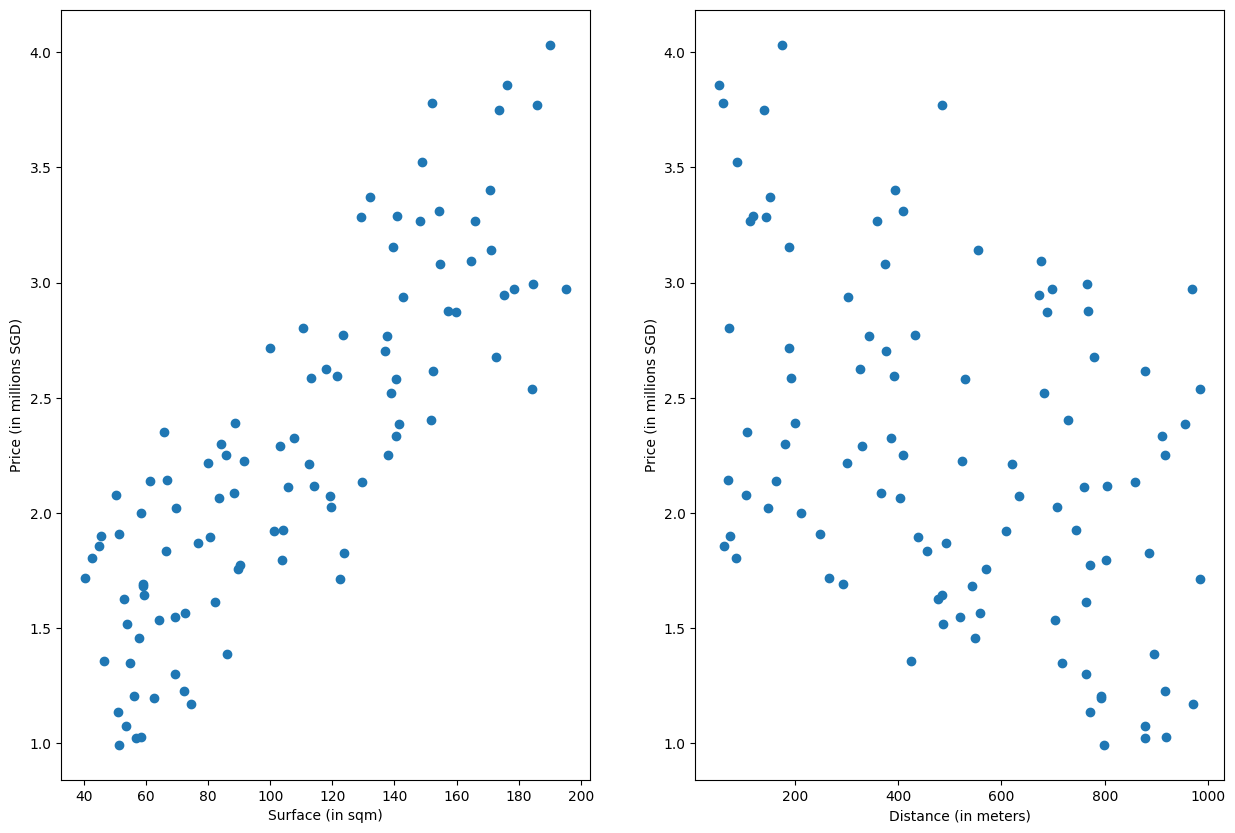

In [4]:
# Initialize matplotlib
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].scatter(surfaces_list, outputs)
axs[0].set_xlabel('Surface (in sqm)')
axs[0].set_ylabel('Price (in millions SGD)')
axs[1].scatter(distances_list, outputs)
axs[1].set_xlabel('Distance (in meters)')
axs[1].set_ylabel('Price (in millions SGD)')
# Display
plt.show()

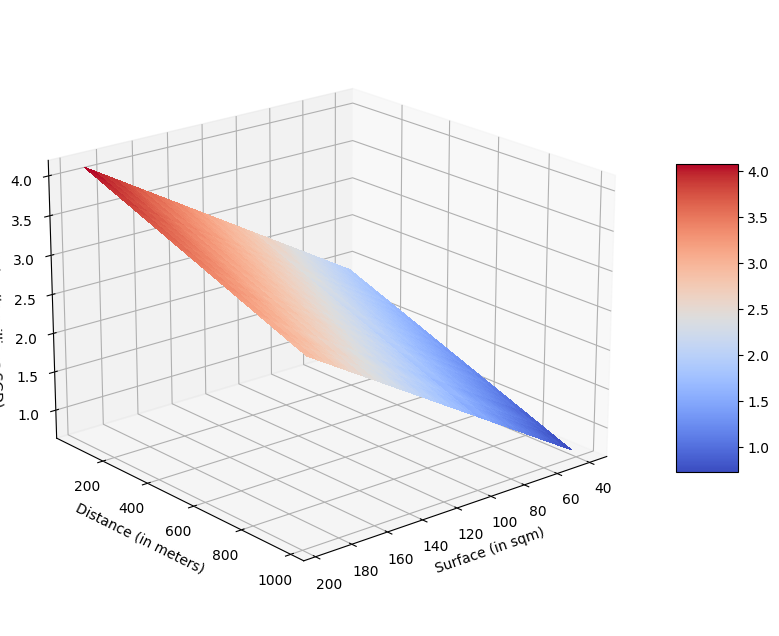

In [5]:
# Initialize plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (12, 8))
# Rework inputs and outputs as meshgrid
X, Y = np.meshgrid(sorted(surfaces_list), sorted(distances_list))
Z = np.round((100000 + 14373*X + (1000 - Y)*1286))/1000000
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
# Axis labels
ax.set_xlabel('Surface (in sqm)')
ax.set_ylabel('Distance (in meters)')
ax.set_zlabel('Average Price (in millions SGD)')
# Rotate display around Z-axis
ax.view_init(20, 50)
# Display colorbar for Z values
fig.colorbar(surf, shrink = 0.5, aspect = 5)
# Show
plt.show()

In [7]:
W = np.array([[14373/1000000], [-1286/1000000]])
b = np.ones(shape = (1, 1))*1.386 # 100000/1000000 + 1000*1286/1000000
Z = np.matmul(inputs, W)
pred = Z + b
print(inputs.shape)
print(W.shape)
print(b.shape)
print(Z.shape)
print(pred.shape)
print(outputs.shape)

(100, 2)
(2, 1)
(1, 1)
(100, 1)
(100, 1)
(100,)


In [8]:
print(pred[0:5, :])
print(outputs[0:5])

[[3.43287964]
 [2.05698999]
 [1.69261797]
 [2.77129383]
 [1.50999346]]
[3.771199 2.137174 1.774299 2.535938 1.454838]


In [9]:
def all_operations(inputs, W, b):
    Z = np.matmul(inputs, W)
    pred = Z + b
    return pred

In [10]:
def MSE_loss_function(pred, outputs):
    outputs_re = outputs.reshape(-1, 1)
    losses = (pred - outputs_re)**2
    loss = np.sum(losses)/outputs.shape[0]
    return loss

In [11]:
W_model1 = np.array([[14373/1000000], [-1286/1000000]])
b_model1 = np.ones(shape = (1, 1))*1.386 # 100000/1000000 + 1000*1286/1000000
pred_1 = all_operations(inputs, W_model1, b_model1)
loss1 = MSE_loss_function(pred_1, outputs)
print(loss1)

0.018200656367088376


In [12]:
W_model2 = np.array([[20000/1000000], [-800/1000000]])
b_model2 = np.ones(shape = (1, 1))*1.1 # 100000/1000000 + 1000*1286/1000000
pred_2 = all_operations(inputs, W_model2, b_model2)
loss2 = MSE_loss_function(pred_2, outputs)
print(loss2)

0.4181406112461601


In [13]:
W_model3 = np.array([[30000/1000000], [-400/1000000]])
b_model3 = np.ones(shape = (1, 1))*0.7 # 100000/1000000 + 1000*1286/1000000
pred_3 = all_operations(inputs, W_model3, b_model3)
loss3 = MSE_loss_function(pred_3, outputs)
print(loss3)

2.6330701566536


In [14]:
# Define neural network structure
n_x = 2
n_h = 4
n_y = 1

In [15]:
W1 = np.random.randn(n_x, n_h)*0.01
b1 = np.zeros(shape = (1, n_h))
W2 = np.random.randn(n_h, n_y)*0.01
b2 = np.zeros(shape = (1, n_y))
print(W1)
print(b1)
print(W2)
print(b2)

[[-0.00302059 -0.00034747 -0.00723123  0.00323297]
 [ 0.01366302  0.00068333 -0.00026003 -0.01059089]]
[[0. 0. 0. 0.]]
[[-0.00225818]
 [ 0.01601361]
 [-0.01447737]
 [ 0.00486691]]
[[0.]]


In [16]:
Z1 = np.matmul(inputs, W1)
print(inputs.shape)
print(W1.shape)
print(Z1.shape)

(100, 2)
(2, 4)
(100, 4)


In [17]:
Z1_b = Z1 + b1
print(Z1.shape)
print(b1.shape)
print(Z1_b.shape)
print(Z1[0:10, :])
print(b1)
print(Z1_b[0:10, :])

(100, 4)
(1, 4)
(100, 4)
[[ 6.07041119  0.26710077 -1.47006658 -4.53979377]
 [ 2.04227431  0.09010693 -0.48544804 -1.52844373]
 [10.25736239  0.49526884 -0.8533156  -7.87049777]
 [12.88533759  0.60821671 -1.58934497 -9.82366007]
 [ 7.3134424   0.354443   -0.55945631 -5.6176091 ]
 [10.75070015  0.52761548 -0.57793466 -8.28774165]
 [ 2.46453861  0.10587376 -0.69210204 -1.83146711]
 [ 4.09794142  0.18179889 -0.93718555 -3.07142354]
 [12.02233291  0.57366932 -1.25323725 -9.19380543]
 [12.37262652  0.60734634 -0.66026139 -9.53868378]]
[[0. 0. 0. 0.]]
[[ 6.07041119  0.26710077 -1.47006658 -4.53979377]
 [ 2.04227431  0.09010693 -0.48544804 -1.52844373]
 [10.25736239  0.49526884 -0.8533156  -7.87049777]
 [12.88533759  0.60821671 -1.58934497 -9.82366007]
 [ 7.3134424   0.354443   -0.55945631 -5.6176091 ]
 [10.75070015  0.52761548 -0.57793466 -8.28774165]
 [ 2.46453861  0.10587376 -0.69210204 -1.83146711]
 [ 4.09794142  0.18179889 -0.93718555 -3.07142354]
 [12.02233291  0.57366932 -1.25323725 -9

In [18]:
print(W2.shape)
print(Z1_b.shape)
Z2 = np.matmul(Z1_b, W2)

(4, 1)
(100, 4)


In [19]:
Z2_b = Z2 + b2
print(Z2.shape)
print(b2.shape)
print(Z2_b.shape)
print(Z2[0:10, :])
print(b2)
print(Z2_b[0:10, :])

(100, 1)
(1, 1)
(100, 1)
[[-0.01024293]
 [-0.00357968]
 [-0.04118322]
 [-0.04415906]
 [-0.03008013]
 [-0.04779676]
 [-0.00276373]
 [-0.00772301]
 [-0.04456398]
 [-0.05507894]]
[[0.]]
[[-0.01024293]
 [-0.00357968]
 [-0.04118322]
 [-0.04415906]
 [-0.03008013]
 [-0.04779676]
 [-0.00276373]
 [-0.00772301]
 [-0.04456398]
 [-0.05507894]]


In [24]:
def forward_propagation(inputs, W1, b1, W2, b2):
    Z1 = np.matmul(inputs, W1)
    Z1_b = Z1 + b1
    Z2 = np.matmul(Z1_b, W2)
    Z2_b = Z2 + b2
    return Z2_b

In [27]:
W1 = np.random.randn(n_x, n_h)*0.01
b1 = np.zeros(shape = (1, n_h))
W2 = np.random.randn(n_h, n_y)*0.01
b2 = np.zeros(shape = (1, n_y))
pred = forward_propagation(inputs, W1, b1, W2, b2)
print(Z2_b[0:5, :])
print(outputs[0:5])

[[-0.01024293]
 [-0.00357968]
 [-0.04118322]
 [-0.04415906]
 [-0.03008013]]
[3.771199 2.137174 1.774299 2.535938 1.454838]


In [28]:
loss = MSE_loss_function(pred, outputs)
print(loss)

5.935226741540401
